In [191]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [192]:
cols= ["fLength","fWidth","fSize","fConc", "fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv("Desktop/magic04.data", names = cols)

In [193]:
df


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [194]:
df["class"] = (df["class"]=="g").astype(int)


In [195]:
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


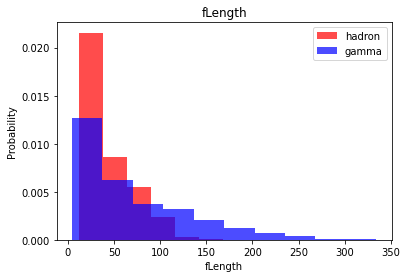

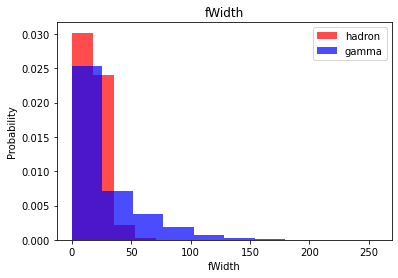

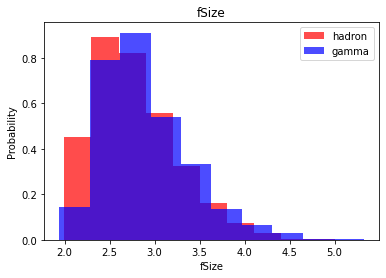

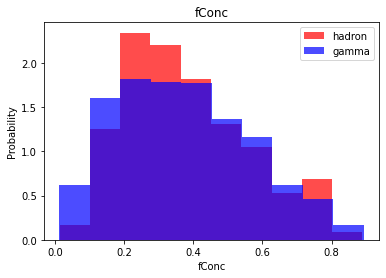

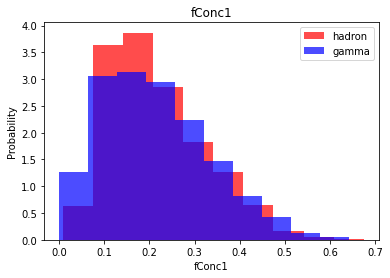

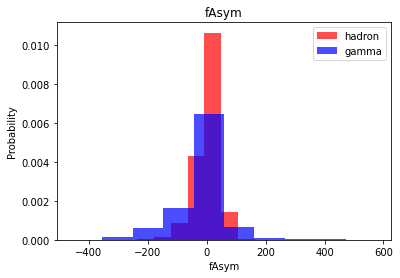

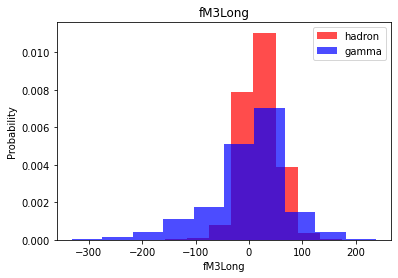

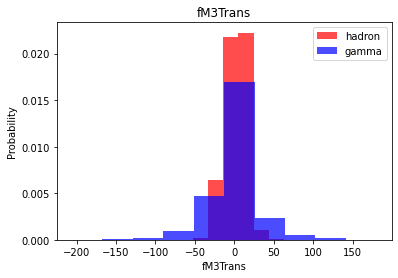

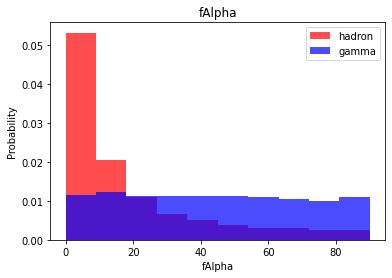

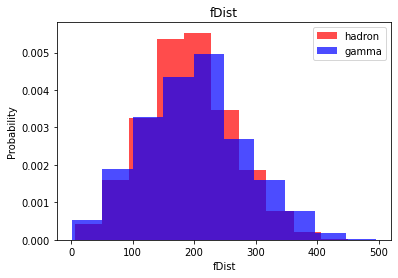

In [196]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color='red', label = 'hadron',alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color='blue', label = 'gamma',alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [197]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6 * len(df)), int(0.8* len(df))])

In [198]:
train


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
12963,59.1880,21.3128,2.7029,0.3945,0.2170,-17.9171,-71.8955,12.1956,10.2763,121.2910,0
14114,15.1409,7.5900,2.4728,0.6516,0.4086,11.2603,15.7032,2.0275,28.7100,230.0500,0
7934,23.3930,17.6420,2.4401,0.3557,0.1942,-10.5439,8.1856,-15.3245,23.0778,175.2940,1
8554,50.6985,39.4320,3.3919,0.2052,0.1142,22.2129,45.0357,24.9434,9.5042,43.7529,1
8771,30.8816,23.3840,2.6201,0.3621,0.1859,-29.0495,-23.4351,16.1253,27.0824,129.1710,1
...,...,...,...,...,...,...,...,...,...,...,...
6430,75.5588,21.1687,3.2084,0.1745,0.0907,11.8419,39.4795,-10.1011,0.0130,251.7930,1
4703,15.9620,11.5356,2.3541,0.6195,0.3827,2.8408,-5.2555,-7.6390,59.1671,146.2370,1
9213,31.1773,20.1391,2.8666,0.2842,0.1638,-0.3975,17.2716,6.4543,7.6110,131.3350,1
9121,29.8441,16.2333,2.4742,0.2987,0.1527,37.1320,-16.2669,-8.4272,15.5205,198.9730,1


In [199]:
valid

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
15770,47.6160,15.4392,2.6851,0.3461,0.1926,26.3862,30.8019,-13.8606,54.8006,178.1493,0
11656,20.3930,7.2693,2.0774,0.7197,0.3808,1.7435,-8.8963,5.6807,8.8679,158.7630,1
5870,65.9566,20.7513,2.7455,0.3019,0.1518,62.2307,56.0095,-16.9916,4.1510,257.0170,1
16637,42.5547,10.4196,2.7997,0.3775,0.2450,19.8116,18.0841,-5.8287,84.6029,51.0650,0
3572,20.8833,16.8717,2.5611,0.5687,0.3585,-5.7111,16.1787,-11.0063,17.9992,249.1740,1
...,...,...,...,...,...,...,...,...,...,...,...
4963,21.1621,6.9275,2.2799,0.7297,0.4121,22.4861,13.0544,6.2256,15.5879,160.1310,1
10650,12.9327,11.1117,2.0986,0.7331,0.4502,14.2703,-7.4493,-6.7747,73.4370,191.5790,1
6158,94.8262,34.3604,3.6921,0.1908,0.0999,-44.6184,51.8420,-15.2767,0.5894,353.5360,1
16716,28.8017,15.3571,2.6835,0.4352,0.2311,40.2907,-13.3506,15.3548,52.0461,216.4660,0


In [200]:
test

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
15537,26.6759,8.0837,2.5459,0.6145,0.4168,3.0689,23.8389,10.2320,4.3881,140.235,0
3392,43.3839,29.4361,3.3516,0.1878,0.0977,34.1361,33.5090,-22.1787,6.0236,154.749,1
5,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.098,1
3022,103.0200,23.7979,3.0045,0.2138,0.1331,-144.2650,83.1531,-16.6329,8.6009,199.150,1
1287,23.9073,12.3949,2.2923,0.6071,0.3750,-25.7692,-13.9242,-4.2336,3.1450,111.872,1
...,...,...,...,...,...,...,...,...,...,...,...
17385,168.0680,78.9017,3.5081,0.2328,0.1277,-34.0749,-107.9860,-49.9455,66.1820,320.589,0
9273,27.4953,16.4672,2.5112,0.4099,0.2142,33.6518,17.0504,7.0734,7.1130,161.221,1
14842,31.0974,12.9377,2.7284,0.4206,0.2364,27.7938,24.7895,6.5430,42.6710,216.320,0
318,31.0208,10.3206,2.5218,0.5444,0.2992,-37.1024,-15.7849,-7.8747,8.2969,189.763,1


In [201]:
def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x = scaler.fit_transform(x)

  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  data = np.hstack((x, np.reshape(y, (-1, 1))))

  return data, x, y

In [202]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid,y_valid = scale_dataset(valid, oversample=False)
test, x_test,y_test = scale_dataset(test, oversample=False)

In [207]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [211]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier()

In [215]:
y_pred= knn_model.predict(x_test)

In [221]:
#print(classification_report(y_test, y_pred))
ex=classification_report(y_test, y_pred)
print (ex)

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1302
           1       0.86      0.86      0.86      2502

    accuracy                           0.82      3804
   macro avg       0.79      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804

